In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import xgboost as xgb
import umap
import HomeMade as hm
from sklearn.metrics import roc_curve, roc_auc_score
import importlib
from sklearn.preprocessing import StandardScaler
hm = importlib.reload(hm)

In [15]:
all_features = "v0_ks_mass v0_ks_massErr pv0_x pv0_y pv0_z a0xy a0 a0z cosTheta v0_chi2 \
v0_x v0_y v0_z v0_rxy v0_rxyErr v0_px v0_py v0_pz v0_pt v0_p \
v0_ptErr v0_la_mass v0_lb_mass \
v0_px1 v0_py1 v0_pz1 v0_pt1 \
v0_p1 v0_px2 v0_py2 v0_pz2 v0_pt2 v0_p2 v0_phi1 v0_theta1 \
v0_qOverP1 v0_phi2 v0_theta2 v0_qOverP2 alpha calpha epsilon1 \
epsilon2 Alpha pL1 pL2 pT thetastar rapidity_ks pseudorapidity".split(" ")

path = "data/data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root"
file = uproot.open(path)
data = file['tree'].pandas.df(all_features, entrystop = 1e4)

path = "data/mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_0.root"
file = uproot.open(path)
mc = file['tree'].pandas.df(all_features + ['trueKs','trueLa','trueLb'], entrystop = 2e5)

data = data.loc[(data.v0_ks_mass > 400) & (data.v0_ks_mass < 600)]
train_test_slice = int(len(data)*0.5)
train_data = data[:train_test_slice]
test_data = data[train_test_slice:]

mc = mc.loc[(mc.v0_ks_mass > 400) & (mc.v0_ks_mass < 600)]
train_test_slice = int(len(mc)*0.5)
train_mc = mc[:train_test_slice]
test_mc = mc[train_test_slice:]

In [6]:
umap_feats = "pv0_x pv0_y pv0_z \
v0_x v0_y v0_z v0_px v0_py v0_pz v0_pt v0_p v0_ptErr \
v0_px1 v0_py1 v0_pz1 v0_pt1 \
v0_p1 v0_px2 v0_py2 v0_pz2 v0_pt2 v0_p2 v0_phi1 v0_theta1 \
v0_qOverP1 v0_phi2 v0_theta2 v0_qOverP2 alpha calpha epsilon1 \
epsilon2 Alpha pL1 pL2 pT thetastar rapidity_ks pseudorapidity".split(" ")
xgb_feats = "a0 a0xy cosTheta v0_chi2 v0_rxy v0_rxyErr".split(" ")

In [65]:
scaler = StandardScaler()
yumap = umap.UMAP(target_metric_kwds = {'weight':np.zeros(len(train_mc))})

emb = yumap.fit_transform(scaler.fit_transform(train_mc[umap_feats+xgb_feats]),
                                y=train_mc.trueKs+train_mc.trueLa*2+train_mc.trueLb*3)

C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [66]:
umap.umap_.fuzzy_simplicial_set()

TypeError: fuzzy_simplicial_set() missing 4 required positional arguments: 'X', 'n_neighbors', 'random_state', and 'metric'

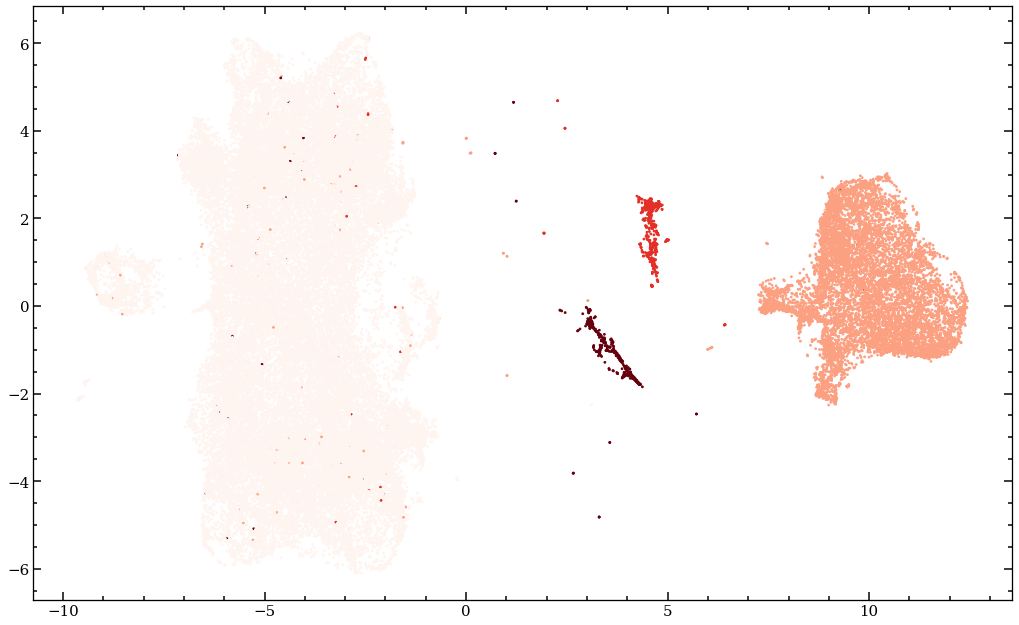

In [67]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(emb[:,0],emb[:,1],s=3,alpha=1,
          c=train_mc.trueKs+train_mc.trueLa*2+train_mc.trueLb*3,cmap=plt.cm.get_cmap('Reds',4))

In [56]:
emb_test = yumap.transform(scaler.transform(test_mc[umap_feats+xgb_feats]))

C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 135:
    @numba.njit(parallel=True)
  

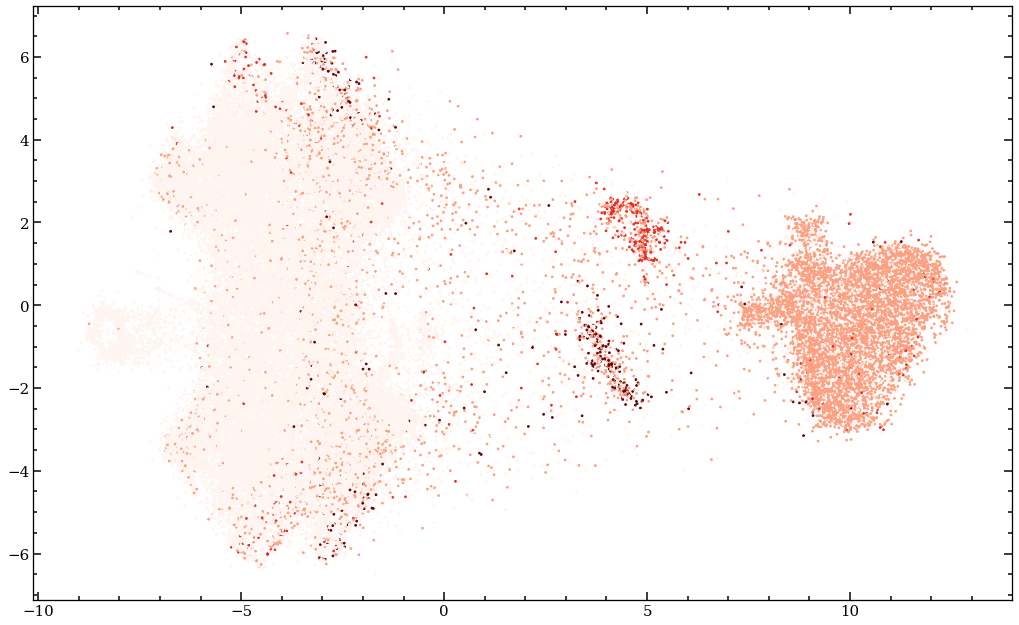

In [57]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(emb_test[:,0],emb_test[:,1],s=3,alpha=1,
          c=test_mc.trueKs+test_mc.trueLa*2+test_mc.trueLb*3,cmap=plt.cm.get_cmap('Reds',4))

In [20]:
(mc.trueKs+mc.trueLa+mc.trueLb).sum()

20516

In [8]:
yumap = umap.UMAP()
scaler = StandardScaler()
emb = yumap.fit_transform(scaler.fit_transform(train_mc[umap_feats]),y=train_mc.trueKs)

C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


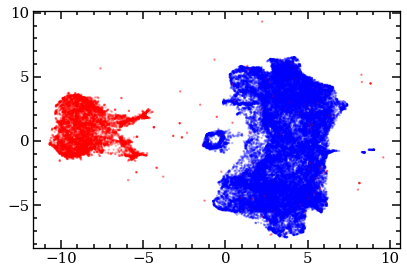

In [9]:
fig, ax = plt.subplots()
ax.scatter(emb[:,0],emb[:,1],s=2,alpha=0.2,c=train_mc.trueKs,cmap='bwr')

In [10]:
emb_test = yumap.transform(scaler.transform(test_mc[umap_feats]))

C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 135:
    @numba.njit(parallel=True)
  

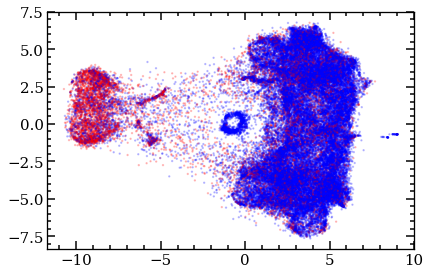

In [11]:
fig, ax = plt.subplots()
ax.scatter(emb_test[:,0],emb_test[:,1],s=2,alpha=0.2,c=test_mc.trueKs,cmap='bwr')

In [19]:
from sklearn.manifold import TSNE
scaler = StandardScaler()
emb = TSNE(verbose=True).fit_transform(scaler.fit_transform(pd.concat([train_mc[umap_feats],test_mc[umap_feats]])), 
                                y=pd.concat([train_mc.trueKs,test_mc.trueKs.apply(lambda x: -1)]))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104637 samples in 0.589s...
[t-SNE] Computed neighbors for 104637 samples in 901.395s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104637
[t-SNE] Computed conditional probabilities for sample 2000 / 104637
[t-SNE] Computed conditional probabilities for sample 3000 / 104637
[t-SNE] Computed conditional probabilities for sample 4000 / 104637
[t-SNE] Computed conditional probabilities for sample 5000 / 104637
[t-SNE] Computed conditional probabilities for sample 6000 / 104637
[t-SNE] Computed conditional probabilities for sample 7000 / 104637
[t-SNE] Computed conditional probabilities for sample 8000 / 104637
[t-SNE] Computed conditional probabilities for sample 9000 / 104637
[t-SNE] Computed conditional probabilities for sample 10000 / 104637
[t-SNE] Computed conditional probabilities for sample 11000 / 104637
[t-SNE] Computed conditional probabilities for sample 12000 / 104637
[t-SNE] Computed conditional proba

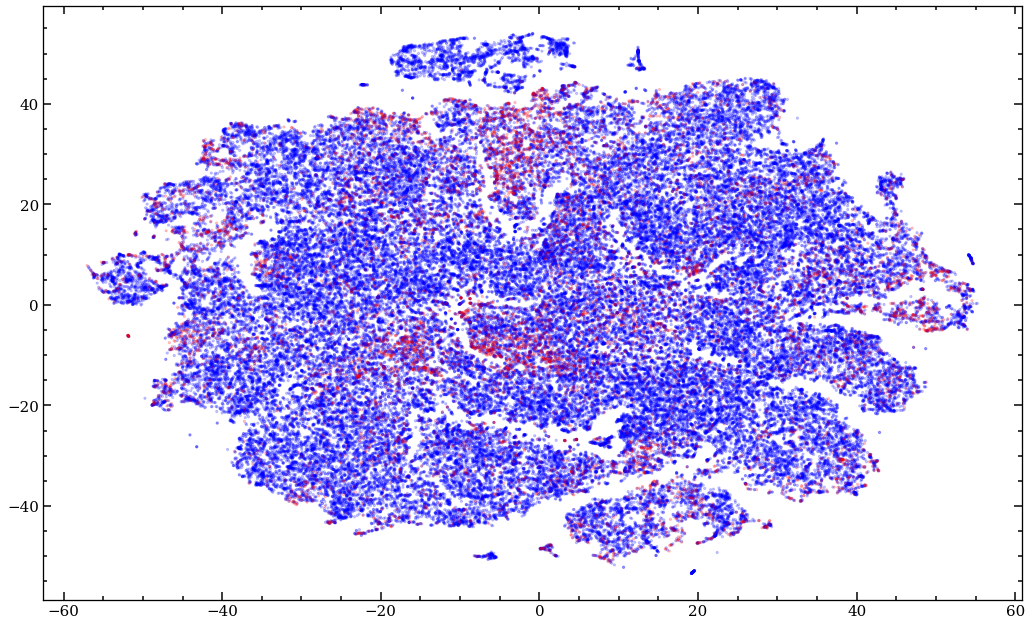

In [23]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(emb[:,0],emb[:,1],s=5,alpha=0.2,c=pd.concat([train_mc.trueKs,test_mc.trueKs]),cmap='bwr')

First try in MC so it's easier to draw ROC curve: (Did not do very well, seperation with umap is difficult on unseen data)

In [4]:
yumap = umap.UMAP(metric='mahalanobis',verbose=True,target_weight=0.1)
emb_train = yumap.fit_transform(train_mc[umap_feats],y=train_mc.trueKs)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Wed Sep 30 22:13:52 2020 Finding Nearest Neighbors
Wed Sep 30 22:13:52 2020 Building RP forest with 16 trees
Wed Sep 30 22:13:55 2020 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
Wed Sep 30 22:14:07 2020 Finished Nearest Neighbor Search
Wed Sep 30 22:14:12 2020 Construct embedding
	completed  0  /  200 epochs
	complet

In [5]:
# cla = xgb.XGBClassifier()
# cla.fit(pd.concat([train_mc[xgb_feats],pd.DataFrame(emb_train,index=train_mc.index,columns=['x','y'])],axis=1),y=train_mc.trueKs)

In [6]:
emb_test = yumap.transform(test_mc[umap_feats])
# p = cla.predict_proba(pd.concat([test_mc[xgb_feats],pd.DataFrame(emb_test,index=test_mc.index,columns=['x','y'])],axis=1))[:,1]

	completed  0  /  30 epochs
	completed  3  /  30 epochs
	completed  6  /  30 epochs
	completed  9  /  30 epochs
	completed  12  /  30 epochs
	completed  15  /  30 epochs
	completed  18  /  30 epochs
	completed  21  /  30 epochs
	completed  24  /  30 epochs
	completed  27  /  30 epochs


In [ ]:
# fpr, tpr, threshold = roc_curve(test_mc.trueKs,p)
# fig, ax = plt.subplots()
# ax.plot(fpr,tpr)

In [31]:
# yumap = umap.UMAP(metric='mahalanobis',verbose=True,target_weight=0.5)
yumap = umap.UMAP(verbose=True,metric='mahalanobis')
emb_train = yumap.fit_transform(train_mc[umap_feats],y=train_mc.trueKs)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='mahalanobis',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Wed Sep 30 18:26:06 2020 Finding Nearest Neighbors
Wed Sep 30 18:26:06 2020 Building RP forest with 16 trees
Wed Sep 30 18:26:08 2020 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	 6  /  16
	 7  /  16
	 8  /  16
	 9  /  16
	 10  /  16
	 11  /  16
	 12  /  16
	 13  /  16
	 14  /  16
	 15  /  16


C:\Users\jv97\anaconda3\lib\site-packages\umap\umap_.py:401: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  "Failed to correctly find n_neighbors for some samples."


Wed Sep 30 18:31:48 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Sep 30 18:32:21 2020 Finished embedding


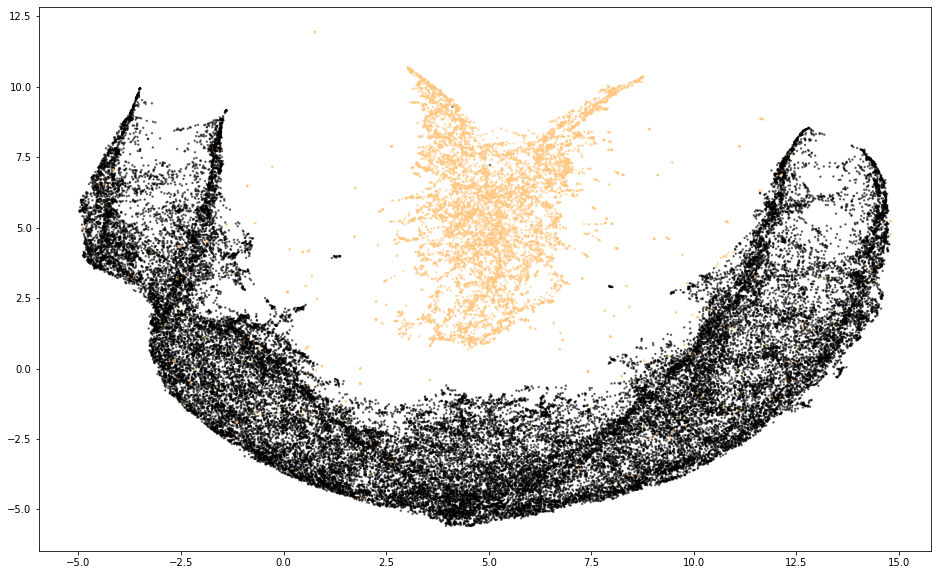

In [7]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(emb_train[:,0],emb_train[:,1],s=2,alpha=0.5,cmap='copper',c=train_mc.trueKs)

In [33]:
emb_test = yumap.transform(test_mc[umap_feats])

ValueError: cannot reshape array of size 784716 into shape (52319,15)

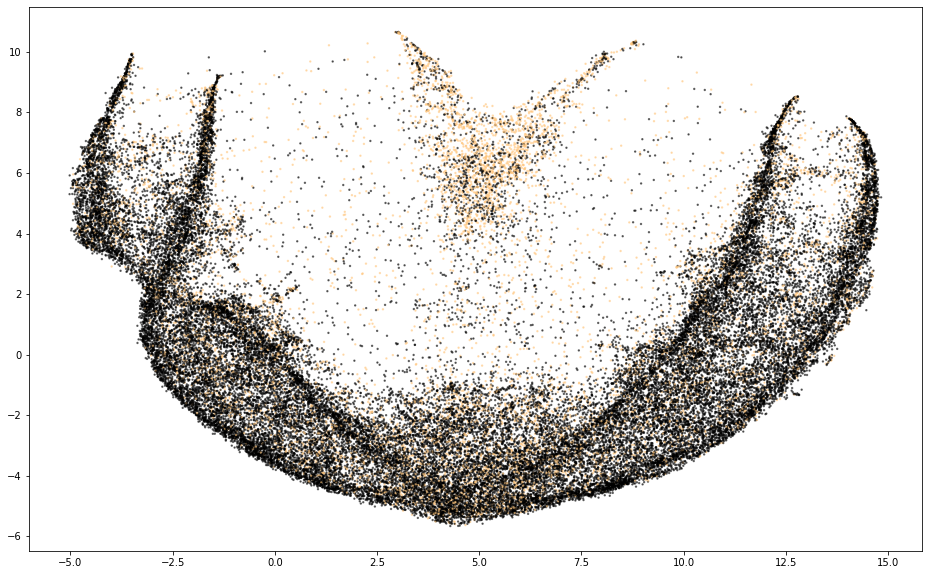

In [8]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(emb_test[:,0],emb_test[:,1],s=2,alpha=0.5,cmap='copper',c=test_mc.trueKs)

Mahalanobis metric seperates very nicely, but returns some weird erros when .transform'ing ;S

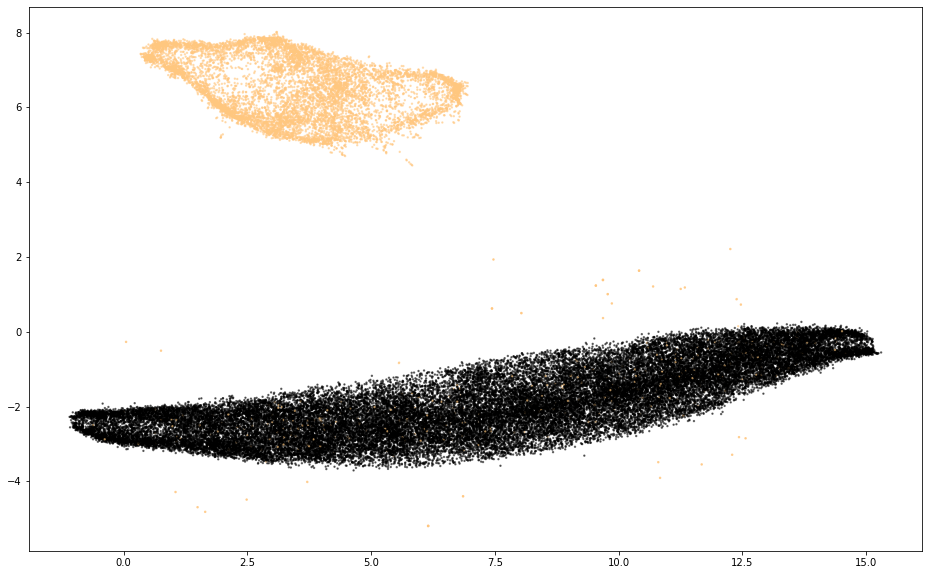

In [32]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(emb_train[:,0],emb_train[:,1],s=2,alpha=0.5,cmap='copper',c=train_mc.trueKs)